# Crime data analysis 2

- The crime data is group into three levels
- Random Forest classification and Nerual net classification are performed on the dataset

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Input the dataset
Total_df = pd.read_pickle('data111original.pkl')
data = Total_df
crime_df = pd.read_pickle('crime_coefficient.pkl') 

In [19]:
data.shape, crime_df.shape

((3146, 79), (3146,))

### Group the crime data into three different groups

In [6]:
def classifier(crimedata):
    y = []
    for i in range(len(crimedata)):
        if crimedata[i] < 0.075:
            y.append(0)
        elif crimedata[i] < 0.15:
            y.append(1)
        else:
            y.append(2)
    return y

## Random Forest classification

In [12]:
feature = list(data.columns.values)
#print(feature_names)
X = np.array(data)
y = classifier(crime_df.values)

my_imputer = preprocessing.Imputer()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
x_train = pd.DataFrame(my_imputer.fit_transform(x_train), columns=feature)
x_test  = pd.DataFrame(my_imputer.transform(x_test), columns=feature)

print(x_train.shape)
print(x_test.shape)

# Look up the shape of train and test data set
print("Train data contains {0} rows and {1} columns".format(x_train.shape[0], x_train.shape[1]))
print("Test data contains {0} rows and {1} columns".format(x_test.shape[0], x_test.shape[1]))

# Look up the possible output of y
print("Train possible labels: ")
print(np.unique(y_train))

print("Test possible labels: ")
print(np.unique(y_test))

# Setup the params:
params = {"n_estimators": 1000} #"max-depth": 5,"silent": 1

# Do the model
rfmodel = RandomForestClassifier(**params).fit(x_train, y_train)
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(rfmodel, x_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# Predict
preds = rfmodel.predict(x_test)

# Count the accuracy
correct = 0

for i in range(len(preds)):
    if y_test[i] == preds[i]:
        correct += 1

acc = accuracy_score(y_test, preds)
print("predicted correctly: {0}/{1}".format(correct, len(preds)))
print("error: {0:.4f}".format(1 - acc))

# Features Importance
importantce_list = list(zip(data.columns, rfmodel.feature_importances_))
def takeSecond(elem):
    return elem[1]
importantce_list.sort(key=takeSecond, reverse=True)
importantce_list[:20]
importantcedf = pd.DataFrame()
importantcedf['feature'] = [item[0] for item in importantce_list]
importantcedf['importance'] = [item[1] for item in importantce_list]

(2674, 79)
(472, 79)
Train data contains 2674 rows and 79 columns
Test data contains 472 rows and 79 columns
Train possible labels: 
[0 1 2]
Test possible labels: 
[0 1 2]
Accuracy: 79.21% (2.70%)
predicted correctly: 367/472
error: 0.2225


In [16]:
importantcetoplot = importantcedf[:8]
importantcetoplot['fea_name'] = ['race','retail','income and poverty','business','retail_2','accommodation','business_2','business_3']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


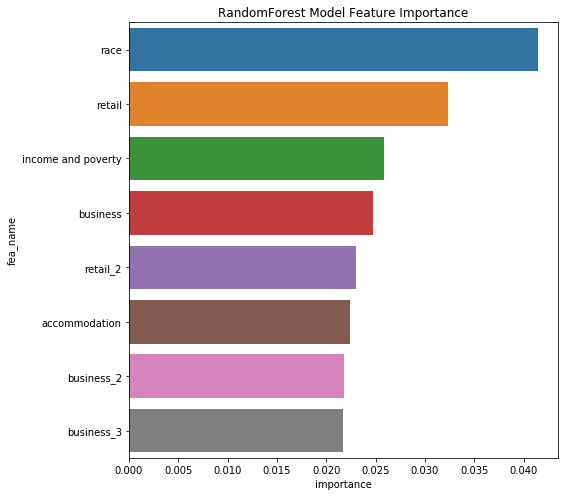

In [17]:
# plot feature importance
plt.figure(figsize=(8,7))
sns.barplot(x="importance", y="fea_name", data=importantcetoplot)
plt.title('RandomForest Model Feature Importance')
plt.tight_layout()
plt.show()

- ### The feature importance is ploted above, which shows that race data is most correlated with crime coefficient.
- ### The classification accuracy is around 80%

## Nerual Net classification

In [ ]:
import numpy as np
import pandas as pd        # For loading and processing the dataset
import tensorflow as tf    # Of course, we need TensorFlow.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

def classifier(crimedata):
    y = []
    for i in range(len(crimedata)):
        if crimedata[i] < 0.075: #
            y.append(0)
        elif crimedata[i] < 0.15: #
            y.append(1)
        else:
            y.append(2)
    return y

class Model:

    def __init__(self, image, label):

        self.image = image
        self.label = label
        self.prediction = self.forward_pass()
        self.loss = self.loss_function()
        self.optimize = self.optimizer()
        self.accuracy = self.accuracy_function()

    def forward_pass(self):
        """
        Predicts a label given an image using fully connected layers

        :return: the predicted label as a tensor
        """
        hidden_size = 200
        # hidden_size2 = 200
        input_size = 79
        num_classes = 3
        U = tf.Variable(tf.random_normal([input_size,hidden_size], stddev=.1))
        bU = tf.Variable(tf.random_normal([hidden_size], stddev=.1))
        # U2 = tf.Variable(tf.random_normal([hidden_size,hidden_size2], stddev=.1))
        # bU2 = tf.Variable(tf.random_normal([hidden_size2], stddev=.1))
        V = tf.Variable(tf.random_normal([hidden_size,num_classes], stddev=.1))
        bV = tf.Variable(tf.random_normal([num_classes], stddev=.1))
        L1Output = tf.matmul(self.image,U)+bU
        L1Output=tf.nn.relu(L1Output)
        # L2Output = tf.matmul(L1Output,U2)+bU2
        #L2Output=tf.nn.relu(L2Output)
        prbs=tf.matmul(L1Output,V)+bV #tf.nn.softmax(
        return prbs
        pass

    def loss_function(self):
        """
        Calculates the model loss

        :return: the loss of the model as a tensor
        """
        # TODO replace pass with loss_function method
        xEnt = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = self.prediction,labels = self.label)

        return tf.reduce_sum(xEnt)

    def optimizer(self):
        """
        Optimizes the model loss

        :return: the optimizer as a tensor
        """
        
        # TODO replace pass with optimizer method
        train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(self.loss)
        return train
        pass

    def accuracy_function(self):
        correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(self.prediction), 1),
                                      self.label)
        return tf.reduce_mean(tf.cast(correct_prediction, tf.float64))


def main():

    # Input the dataset
    Total_df = pd.read_pickle('data111original.pkl')
    # data = Total_df.drop(['CRM_0','CRM_1'], axis = 1)
    data = Total_df
    crime_df = pd.read_pickle('crime_coefficient.pkl') 
    data = RobustScaler().fit_transform(data.values)
    X_train, X_test, y_train, y_test = train_test_split(data, classifier(crime_df.values), test_size=0.15)
    print(X_train.shape)
    # TODO: Set-up placeholders for inputs and outputs
    input_size = 79
    learning_rate = 0.001
    batch_size = 100
    inpt = tf.placeholder(tf.float32,[None, input_size])
    outpt = tf.placeholder(tf.int64,shape = [None])
    
    # TODO: initialize model and tensorflow variables
    
    # TODO: Set-up the training step, for as many of the 60,000 examples as you'd like
    #     where the batch size is greater than 1    
    train_model = Model(inpt,outpt)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    accs = []
    for i in range(2):
        k = 0
        for start, end in zip(range(0, len(X_train) - batch_size, batch_size), range(batch_size, len(X_train), batch_size)):
            # print(np.array(X_train[start:end]).astype(np.float32))
            # print(y_train[start:end])
            acc, _ = sess.run([train_model.accuracy, train_model.optimize], feed_dict={inpt: np.array(X_train[start:end]).astype(np.float32), outpt: y_train[start:end]})
            accs.append(acc)
            k += 1
        
 #       print ("Test Accuracy: %r", train_model.accuracy)
    print(sess.run(train_model.accuracy, feed_dict={inpt: np.array(X_test).astype(np.float32),outpt: y_test}))
    plt.plot(range(1,len(accs)+1), accs, '.')
    plt.axvline(x=k, linestyle='--', color = 'gray')
    plt.axvline(x=2*k, linestyle='--', color = 'gray')
    plt.xlabel('batch number')
    plt.ylabel('accuracy')
    plt.show()

    return

if __name__ == '__main__':
    main()

<img src="crimeresult.png">

- ### The accuracy after each batch is shown above
- ### The test accuracy is 74%